In [3]:
import numpy as np
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_ = pd.get_dummies(df)
filtro_ausencia = df_['stroke'] == 0
filtro_avc = df_['stroke'] == 1
df_avc = df_[filtro_avc]
df_ausencia = df_[filtro_ausencia]
df_ausencia = df_ausencia.iloc[0:249]
df_ = pd.concat([df_ausencia, df_avc])
df_

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,30669,3.0,0,0,95.12,18.0,0,False,True,False,...,False,False,False,True,True,False,True,False,False,False
250,30468,58.0,1,0,87.96,39.2,0,False,True,False,...,False,True,False,False,False,True,False,False,True,False
251,16523,8.0,0,0,110.89,17.6,0,True,False,False,...,False,True,False,False,False,True,True,False,False,False
252,56543,70.0,0,0,69.04,35.9,0,True,False,False,...,False,True,False,False,True,False,False,True,False,False
253,46136,14.0,0,0,161.28,19.1,0,False,True,False,...,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,57.0,0,0,84.96,36.7,1,False,True,False,...,False,True,False,False,True,False,True,False,False,False
245,49669,14.0,0,0,57.93,30.9,1,True,False,False,...,False,False,False,True,True,False,True,False,False,False
246,27153,75.0,0,0,78.80,29.3,1,True,False,False,...,False,False,True,False,True,False,False,True,False,False
247,34060,71.0,1,0,87.80,NaN,1,False,True,False,...,False,False,True,False,True,False,True,False,False,False


In [5]:
df_ = df_.drop('bmi', axis=1)
df_ = df_.drop('avg_glucose_level', axis=1)
df_ = df_.drop('id', axis = 1)
df_

,age,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,3.0,0,0,0,False,True,False,True,False,False,False,False,False,True,True,False,True,False,False,False
250,58.0,1,0,0,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
251,8.0,0,0,0,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False
252,70.0,0,0,0,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
253,14.0,0,0,0,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.0,0,0,1,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False
245,14.0,0,0,1,True,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False
246,75.0,0,0,1,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False
247,71.0,1,0,1,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False


In [22]:


df_
y = df_['stroke']
X = df_.drop('stroke', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
y_train.replace(0,-1,inplace=True)
y_test.replace(0,-1,inplace=True)

In [23]:
def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = X_train.to_numpy().T.astype('float64')
alvos = y_train.to_numpy().astype('float64')

print(pontos.shape, alvos.shape)

w = np.random.randn(19,1)
b = 0.3
alpha = 0.0001

erros = []
for n in range(50000):
    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]
    est = w.T @ pontos + b
    mse = np_.mean( (est - alvos)**2)
    erros.append(mse)

print(w)
print(b)

(19, 249) (249,)
[[ 0.0180197 ]
 [ 0.28662015]
 [ 0.25051428]
 [ 0.57509196]
 [ 0.78246111]
 [ 0.88664272]
 [-1.00798541]
 [-1.21584116]
 [ 0.68578465]
 [-1.14146376]
 [ 0.49776314]
 [ 0.71788123]
 [ 0.13169609]
 [-0.30981409]
 [-0.2284235 ]
 [ 0.00280368]
 [ 0.48640843]
 [ 0.05482043]
 [ 0.29905503]]
-0.9066952496850794


In [33]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))
pontos = X_test.to_numpy().T.astype('float64')
alvos = y_test.to_numpy().astype('float64')
est = w.T @ pontos+ b

print(accuracy(est, alvos))

0.7228915662650602


In [32]:
df_['stroke'].value_counts()
print(249/(249+249))

0.5


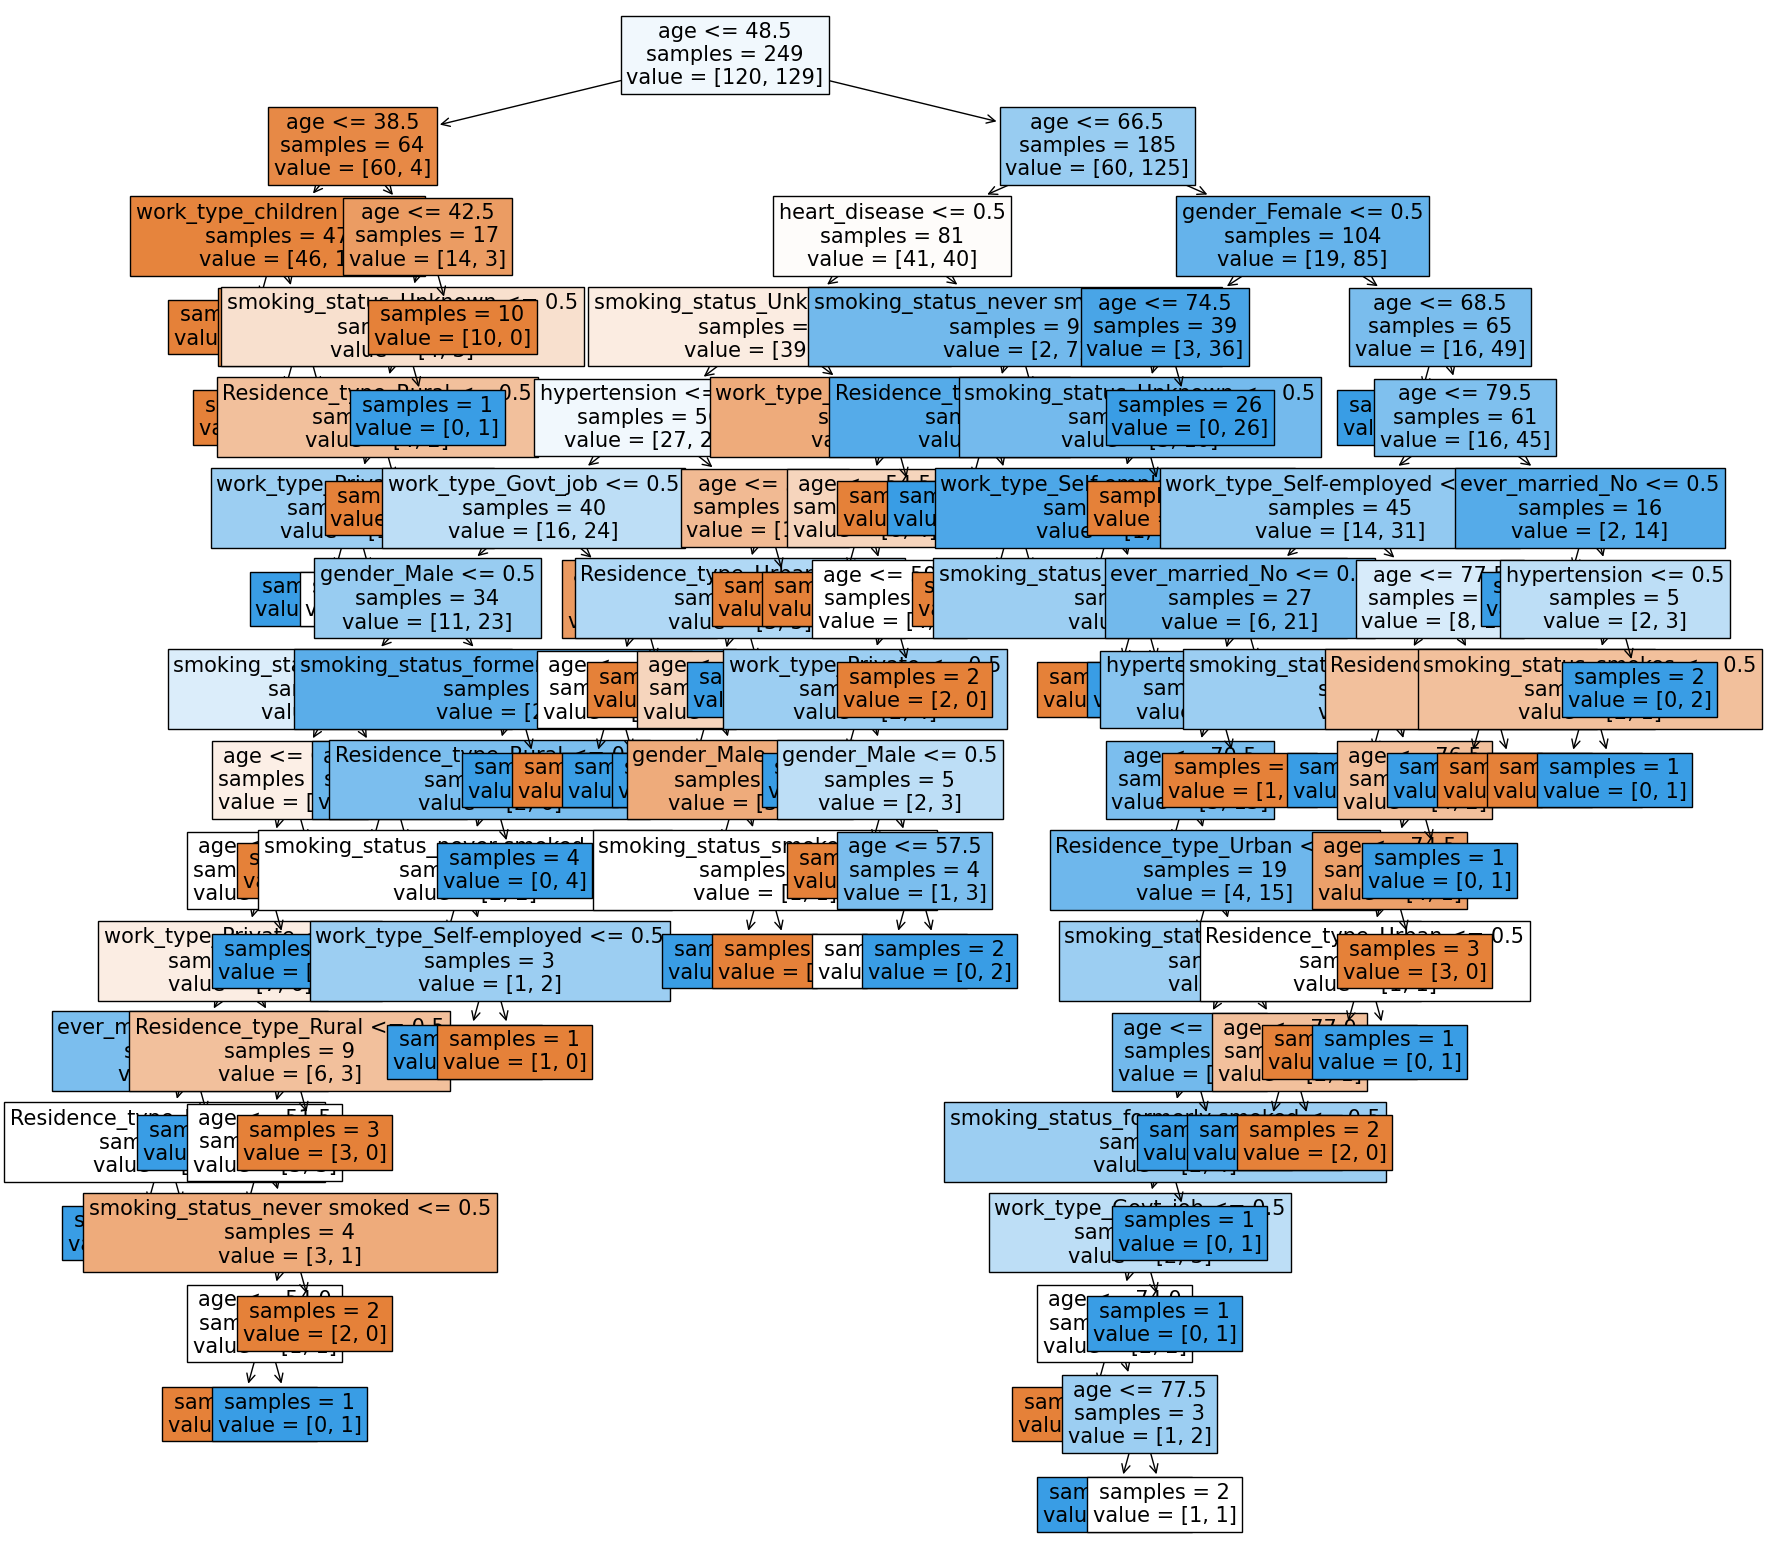

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')

tree.fit(X_test, y_test)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
a = plot_tree(tree, feature_names=X_test.columns, fontsize=15, node_ids=False, impurity=False, filled=True)